<a href="https://colab.research.google.com/github/joel-codeing/code-clause/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [25]:
# Load the dataset
df = pd.read_csv('/content/HousePricePrediction.csv')

# Display the first few rows of the dataset
print(df.head())

   beds  baths  size size_units  lot_size lot_size_units  zip_code    price
0     3      3  2590       sqft   6000.00           sqft     98144   795000
1     4      2  2240       sqft      0.31           acre     98106   915000
2     4      3  2040       sqft   3783.00           sqft     98107   950000
3     4      3  3800       sqft   5175.00           sqft     98199  1950000
4     2      2  1042       sqft       NaN            NaN     98102   950000


              beds        baths          size     lot_size      zip_code  \
count  2016.000000  2016.000000   2016.000000  1669.000000   2016.000000   
mean      2.857639     2.317460   1735.740575  3871.059694  98123.638889   
std       1.255092     1.109138    920.132591  2719.402066     22.650819   
min       1.000000     1.000000    250.000000     0.230000  98101.000000   
25%       2.000000     2.000000   1068.750000  1252.000000  98108.000000   
50%       3.000000     2.000000   1560.000000  4000.000000  98117.000000   
75%       4.000000     3.000000   2222.500000  6000.000000  98126.000000   
max      15.000000     9.000000  11010.000000  9998.000000  98199.000000   

              price  
count  2.016000e+03  
mean   9.636252e+05  
std    9.440954e+05  
min    1.590000e+05  
25%    6.017500e+05  
50%    8.000000e+05  
75%    1.105250e+06  
max    2.500000e+07  

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_si

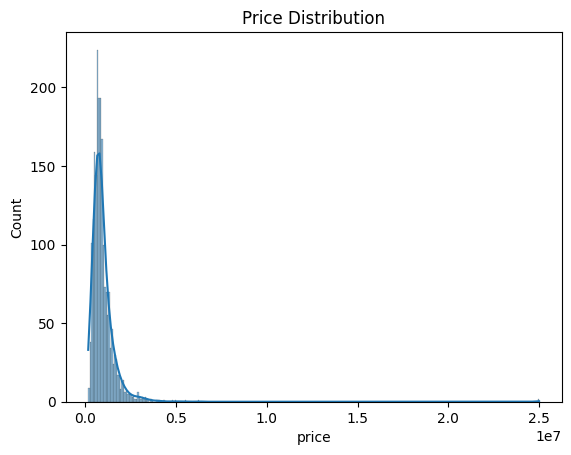

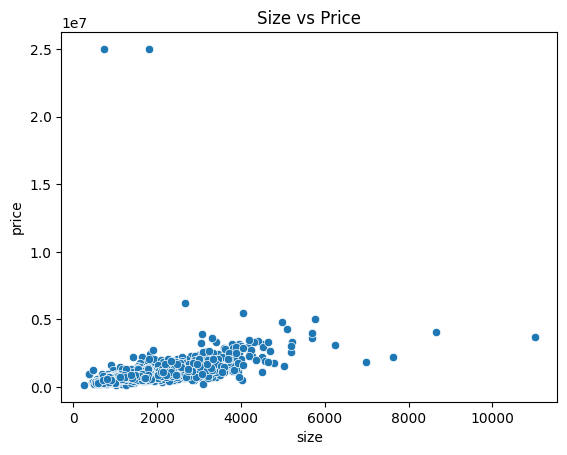

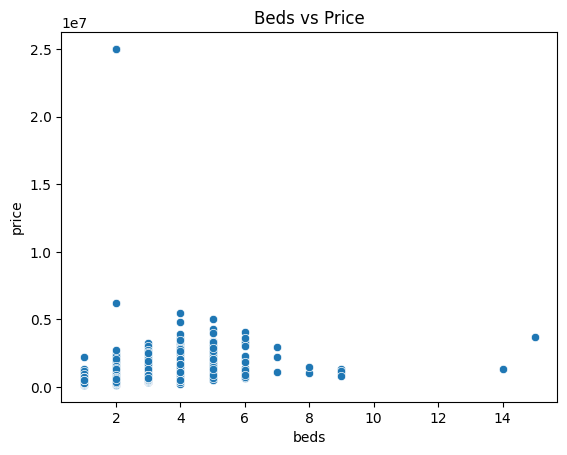

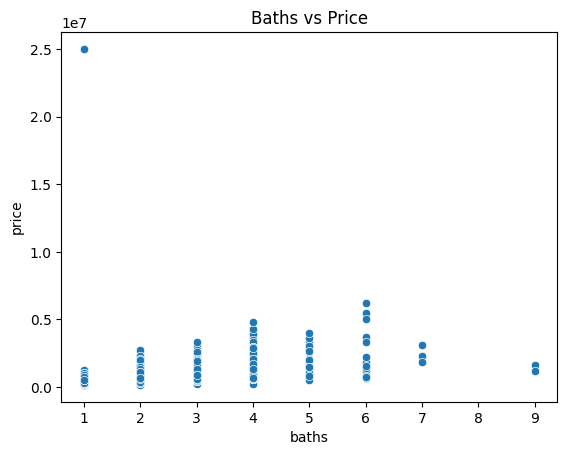

In [26]:
# Summary statistics
print(df.describe())
print()

# Checking for missing values
print(df.isnull().sum())
print()

# Distribution of Price
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()
print()

# Scatter plot of Size vs Price
sns.scatterplot(x='size', y='price', data=df)
plt.title('Size vs Price')
plt.show()
print()

# Scatter plot of Beds vs Price
sns.scatterplot(x='beds', y='price', data=df)
plt.title('Beds vs Price')
plt.show()
print()

# Scatter plot of Baths vs Price
sns.scatterplot(x='baths', y='price', data=df)
plt.title('Baths vs Price')
plt.show()

In [27]:
# Drop any rows with missing values
df = df.dropna()

# Filtering the DataFrame to keep only rows where 'unit' is 'sqft'
df = df.loc[df['lot_size_units'] == 'sqft']
print(df.head())

# Drop unit column
df = df.drop(['size_units', 'lot_size_units'], axis=1)

# Select features and target variable
X = df.drop(['price'], axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


   beds  baths  size size_units  lot_size lot_size_units  zip_code    price
0     3      3  2590       sqft    6000.0           sqft     98144   795000
2     4      3  2040       sqft    3783.0           sqft     98107   950000
3     4      3  3800       sqft    5175.0           sqft     98199  1950000
6     1      1   670       sqft    6000.0           sqft     98133   460000
7     5      4  4510       sqft    6000.0           sqft     98105  3150000


In [28]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [30]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 2111338504413.3503
R-squared: 0.07833613352431945


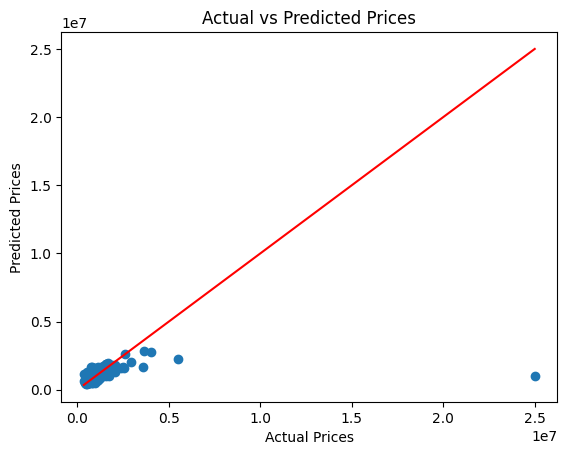

In [31]:
# Scatter plot of Actual vs Predicted Prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line showing perfect prediction
plt.show()

In [32]:
# Sample new input data
new_data = {
    'beds': [3],
    'baths': [2],
    'size': [1500],
    'lot_size': [4000],
    'zip_code': [12345]
}

# Convert the input data to a DataFrame
new_df = pd.DataFrame(new_data)

# Ensure that the new input data has the same columns as the training data
new_df = new_df.reindex(columns=X.columns, fill_value=0)

# Standardize the new input data using the same scaler fitted on the training data
new_scaled_features = scaler.transform(new_df)

# Make predictions
predicted_price = model.predict(new_scaled_features)

# Display the predicted price
print(f'Predicted Price: {predicted_price[0]}')

Predicted Price: 229169633.6322174
